# Correlation and Autocorrelation

## Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Introduction to Course

### A "Thin" Application of Time Series

In [3]:
diet = pd.read_csv('diet.csv', index_col='Date')

In [ ]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

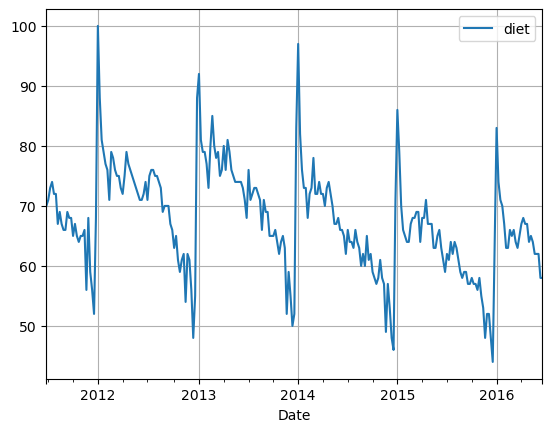

In [5]:
# From previous step
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

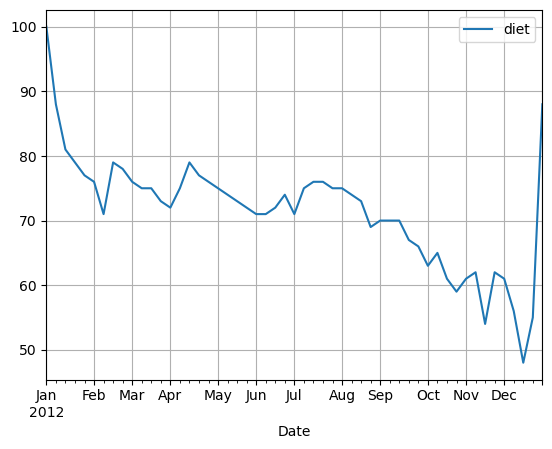

In [8]:
# From previous step
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2012
diet2012 = diet.loc['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

### Merging Time Series With Different Dates

In [11]:
stocks = pd.read_csv('stocks.csv', index_col='observation_date', parse_dates=True)
bonds = pd.read_csv('bonds.csv', index_col='observation_date', parse_dates=True)

In [12]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')

{Timestamp('2008-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2011-11-11 00:00:00')}


## Correlation of Two Time Series

### Correlation of Stocks and Bonds

Correlation of stocks and interest rates:  0.4119448886249272


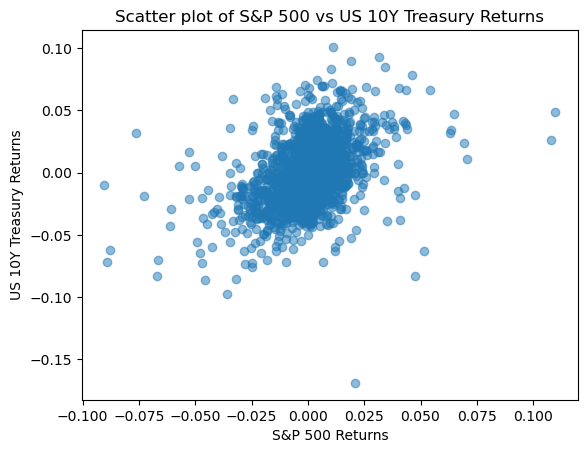

In [20]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'], alpha=0.5)
plt.xlabel('S&P 500 Returns')
plt.ylabel('US 10Y Treasury Returns')
plt.title('Scatter plot of S&P 500 vs US 10Y Treasury Returns')
plt.show()

### Flying Saucers Aren't Correlated to Flying Markets

In [26]:
dji = pd.read_csv('DJI.csv', index_col='Date', parse_dates=True).rename(columns={'Value': 'DJI'})
ufo = pd.read_csv('UFO.csv', index_col='Date', parse_dates=True).rename(columns={'Value': 'UFO'})

levels = dji.join(ufo, how='inner')

In [27]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726428
Correlation of changes:  0.06026935462405373


## Simple Linear Regression

### Looking at a Regression's R-Squared

In [36]:
x = pd.Series(np.random.normal(size=1000, loc=0, scale=1))
y = pd.Series(np.random.normal(size=1000, loc=0, scale=1))

In [37]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.02
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2442
Date:                Tue, 05 Aug 2025   Prob (F-statistic):              0.621
Time:                        14:53:19   Log-Likelihood:                -1438.6
No. Observations:                1000   AIC:                             2881.
Df Residuals:                     998   BIC:                             2891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## Autocorrelation

### A Popular Strategy Using Autocorrelation

In [40]:
MSFT = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)

In [47]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


### Are Interest Rates Autocorrelated?

In [48]:
daily_rates = pd.read_csv('daily_rates.csv', index_col='DATE', parse_dates=True)

In [52]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


/tmp/ipykernel_416286/72785929.py:9: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rates = daily_rates.resample(rule='A').last()
